In [97]:
import numpy as np 
import matplotlib.pyplot as plt 
from logistics import new_cav_model , J_analytical_new
from numpy.fft import fft,fftfreq
from scipy.interpolate import interp1d	


In [229]:
# -- some useful definitions -----
def fast_f_t(x : np.ndarray,y:np.ndarray, M:int = 500):

	t_interp = np.linspace(0, x[-1], M)  
	dt = t_interp[1] - t_interp[0]
	y = np.interp(t_interp,np.real(x), np.real(y)) # i am forcing real values, this might not be correct, but currents should be real 
	y -= np.mean(y)
	k = np.linspace(0, 1 / dt, M + 1)[:-1]
	yk = np.abs(np.fft.fft(y))
	u = yk[: M // 2]
	return 2*np.pi*k[: M // 2], u / np.sum(np.abs(u))

def exp000(gamma,phi,tau,t_max,dt,M = 100 , plot=False):

	''' in this experiment, you simulate the dynamics and look at the spectral analysis of the signal
	(this only makes sense in the non-driven scenario. With driving, I need to fft the whole matrix )'''

	# numerical integration
	w_ref = 2*np.sqrt(gamma/tau)
	w_guess = np.pi / tau 
	cavity = new_cav_model(gamma,phi,tau,0)
	cavity.evolve(t_max,dt)
	t,e = cavity.excited_state([1,0])

	# analytical calculation (single excitation)
	t_a = np.linspace(0,t_max,1000)
	e_an = J_analytical_new(gamma,phi,tau,t)

	# fourier transform 
	freqs,u = fast_f_t(t,e,M=200)
	if plot:
		fig,axs = plt.subplots(1,2,figsize=(12,5))

		axs[0].plot(t,np.abs(e))
		axs[0].plot(t,np.abs(e_an)**2)
		#axs[0].plot(t,np.cos(w_ref/2*t)**2)
		axs[0].grid()


		axs[1].plot(freqs,np.abs(u)) 
		axs[1].axvline(x=w_guess,linestyle='--',color='k',alpha=0.5)
		axs[1].grid()

		plt.show()

	return t,e,freqs,u



# 1. limit $\gamma \tau << 1 $

## 1.1 Cavity limit $(\phi = 0 )$

In [99]:
# ---- parameter definition ------------

gamma = 0.8
tau = 0.15 
phi = 2*np.pi 
t_max = 100*tau
dt = tau/30
w_ref = 2*np.sqrt(gamma/tau)

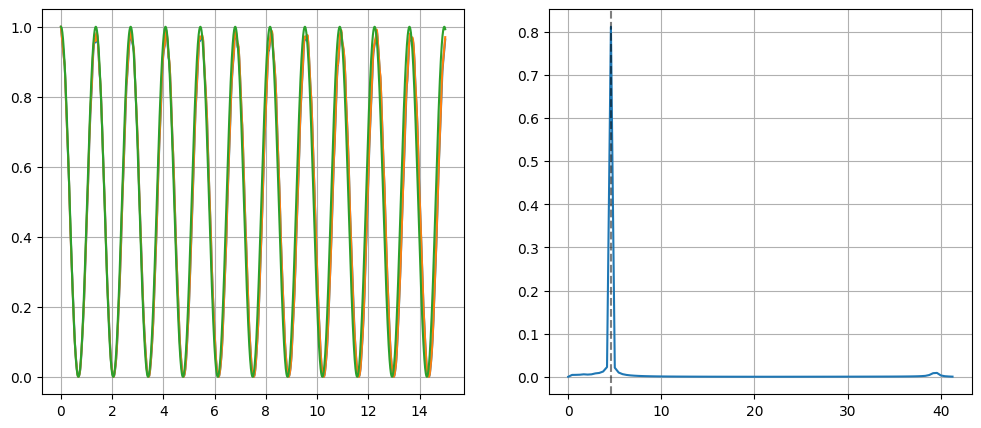

In [ ]:
_=exp000(gamma,phi,tau,t_max,dt,200)

## 1.2 two-mode limit $(\phi = \pi )$ 

This study shows the rather surprising result that, when $\phi = \pi$, then the frequency observed is $ \pi / \tau$ 

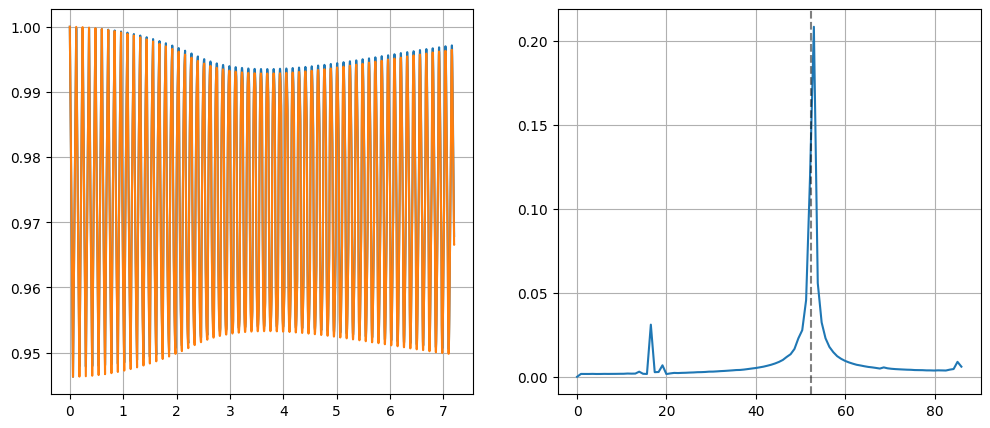

In [232]:
gamma = 0.92
tau = 0.06 
phi = np.pi 
t_max = 120*tau
dt = tau/30

w_ref = 2*np.sqrt(gamma/tau)
w_guess = np.pi / tau

t,e,w,u = exp000(gamma,phi,tau,t_max,dt,plot=True)



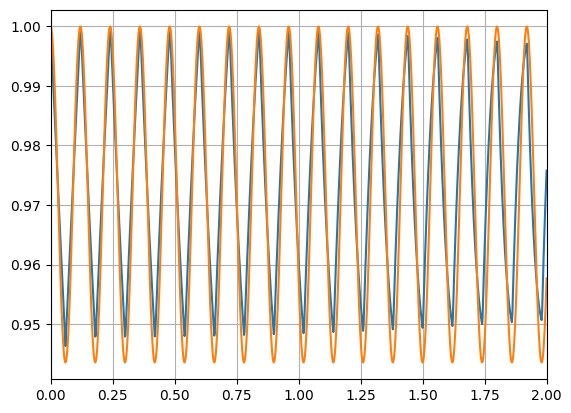

In [ ]:
mv = np.mean(np.abs(e)[0:100])
dif = (1-mv)

plt.plot(t,np.abs(e))
plt.plot(t,mv+dif*np.cos(np.pi/tau*t))
plt.xlim(0,2)
plt.grid()
plt.show()

### 1.2.1 varying $\gamma$ 

In [142]:
tau = 0.15 
phi = np.pi 
t_max = 80*tau
dt = tau/30
w_ref = 2*np.sqrt(gamma/tau)

gamma_values = np.arange(0.7,1.2,0.01)

In [145]:
central_freq =[]
for g in gamma_values:
    t,e,w,u = exp000(g,phi,tau,t_max,dt)
    central_freq.append(w[np.argmax(u)])
central_freq=np.array(central_freq)

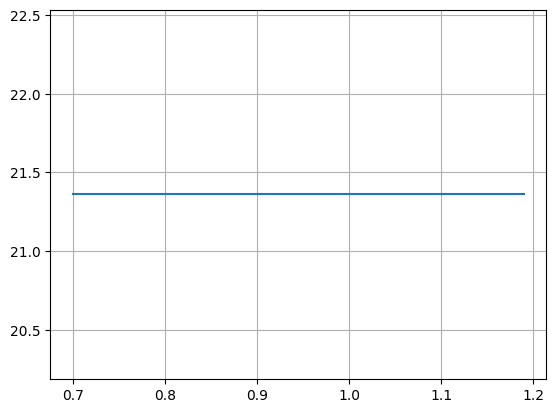

In [ ]:
plt.plot(gamma_values,central_freq)
plt.grid()
plt.show()

conclusion: indepedent of $\gamma$ (surprisingly)

### 1.2.2 varying $\tau$ 

In [185]:
gamma = 0.8
phi = np.pi 
t_max = 80*tau
dt = tau/30
w_ref = 2*np.sqrt(gamma/tau)

tau_values = np.arange(0.07,0.2,0.005)

In [186]:
central_freq =[]
for tau_0 in tau_values:
    t,e,w,u = exp000(gamma,phi,tau_0,t_max,dt)
    central_freq.append(w[np.argmax(u)])
central_freq=np.array(central_freq)

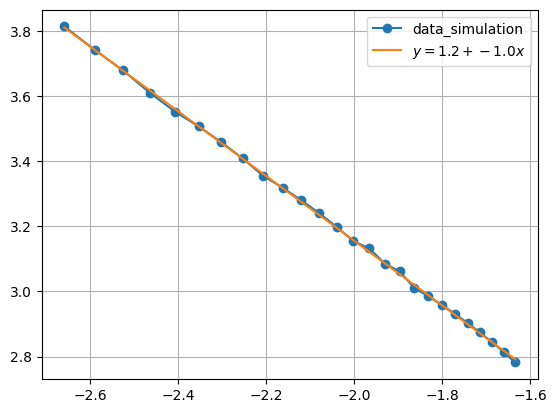

In [187]:
p = np.polyfit(np.log(tau_values),np.log(central_freq),deg=1)

plt.plot(np.log(tau_values),np.log(central_freq),'-o',label='data_simulation')
plt.plot(np.log(tau_values),p[1]+p[0]*np.log(tau_values),label=rf"$y= {p[1]:.1f} + {p[0]:.1f}x $")
plt.legend()
plt.grid()
plt.show()

conclusion: the frequency $\Delta$ is inversly proportional to $\tau$ 

# 2. limit $\gamma \tau \approx  1$ 

# 3. limit $\gamma \tau >> 1 $ 